# Mazen Ibrahim
##  Titanic - Who Will Survive?

# Mazen Ibrahim, 1143853853, Team Number 21
##  Project 2: Titanic - Who Will Survive?

### Clean the Train Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The steps I will take to clean this dataset:  
1) Check for null values and duplicates and fix them  
2) Check for data type issues and fix them  
3) Check for outliers and fix them

In [2]:
# Identify what needs to be cleaned in the data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As seen above, many columns have multiple null values that need to be cleaned. There doesn't seem to be any data type issues.

In [3]:
# Check for the amount of null values and duplicates in the train dataset
print("Num of duplicates: " , data_train.duplicated().sum())
data_train.isna().sum()

Num of duplicates:  0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# For the 2 null values in the Embarked column, I will replace them with random values
data_train['Embarked'] = data_train['Embarked'].replace(np.nan, data_train['Embarked'].sample(1).values[0])
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
# For the 177 null values in the Age column, I will replace them with the mean in order to maintain the mean
age_mean = data_train['Age'].mean()
print(f"The mean of Age before: {age_mean}")

data_train.fillna({'Age' : age_mean}, inplace=True)
age_mean = data_train['Age'].mean()
print(f"The mean of Age After: {age_mean}")
data_train.isna().sum()

The mean of Age before: 29.69911764705882
The mean of Age After: 29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
# For the 687 null values in the cabin column, I will drop this column because it is irrelevant
data_train.drop(['Cabin'], axis=1, inplace=True)
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now I will check for outliers

In [7]:
# Detecting outliers
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the looks of the table above, the fare must have an outlier due to the huge difference between the max value and the 75% value.  
I will plot the Fare in order to get a visualization

<Axes: ylabel='Fare'>

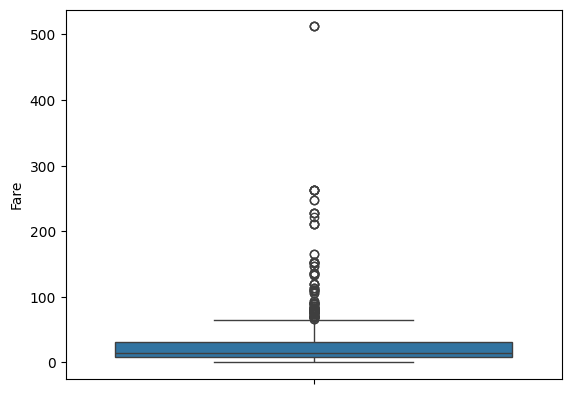

In [8]:
sns.boxplot(data_train['Fare'])

<Axes: ylabel='Fare'>

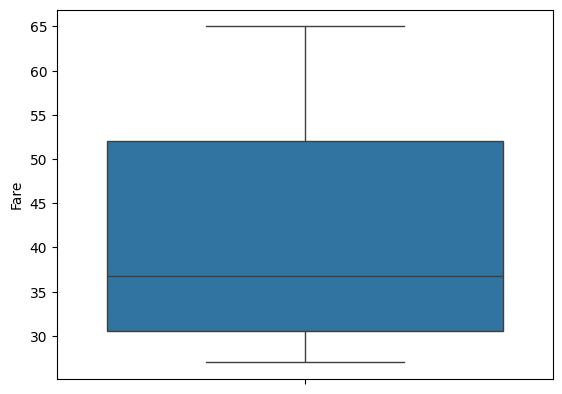

In [9]:
# Remove the outliers using the Interquartile Range Method
lowerQuartile = data_train['Fare'].quantile(0.25)
upperQuartle = data_train['Fare'].quantile(0.75)
IQR = upperQuartle - lowerQuartile
data_train = data_train[ (data_train['Fare'] > abs((lowerQuartile - (1.5*IQR)))) & (data_train['Fare'] < (upperQuartle + (1.5*IQR))) ]
sns.boxplot(data_train['Fare'])

### Clean the Test Dataset  
Now do the same cleaning process for the Test dataset

In [10]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
